### Churn Prediction using Logistic Regression
<p>Churn Prediction is analytical studies on the possibilities of a customer abandoning a product/service.</p>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Rows {} Cols {}".format(data.shape[0],data.shape[1]))

Rows 7043 Cols 21


In [10]:
df=data.copy()

In [11]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


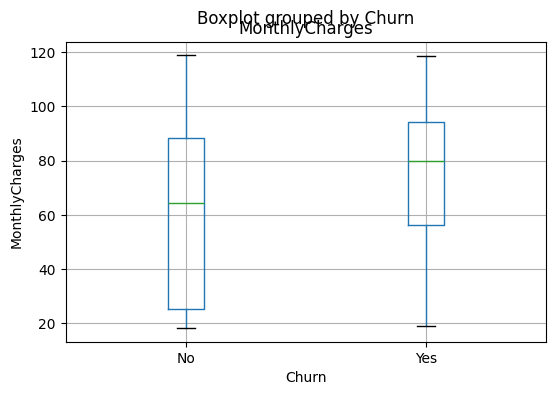

In [15]:
fig=plt.figure(figsize=(6,4))
ax=fig.gca()
df.boxplot(column="MonthlyCharges",by="Churn",ax=ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

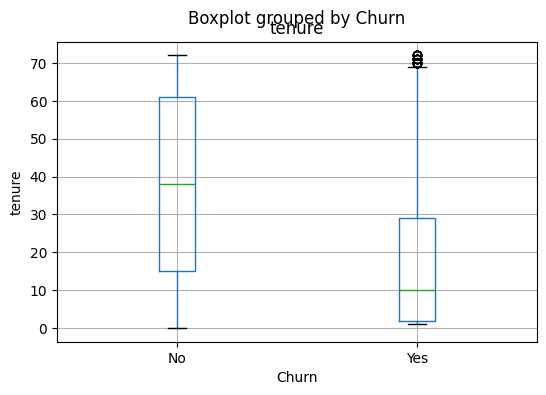

In [16]:
fig=plt.figure(figsize=(6,4))
ax=fig.gca()
df.boxplot(column="tenure",by="Churn",ax=ax)
ax.set_ylabel("tenure")
plt.show()

In [27]:
df["class"]=df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)
X=df[["tenure","MonthlyCharges"]].copy()
y=df["class"].copy()

In [28]:
df.shape

(7043, 22)

In [29]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [30]:
y_train.value_counts()


class
0    4133
1    1501
Name: count, dtype: int64

In [31]:
y_test.value_counts()

class
0    1041
1     368
Name: count, dtype: int64

#### Fiting Logistic Regression on train data

In [32]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(fit_intercept=True,max_iter=1000)
clf.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [33]:
clf.coef_

array([[-0.05646759,  0.03315394]])